# Text Classification Assessment
## Goal: Given a set of text movie reviews that have been labeled negative or positive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('whitegrid')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


<AxesSubplot:>

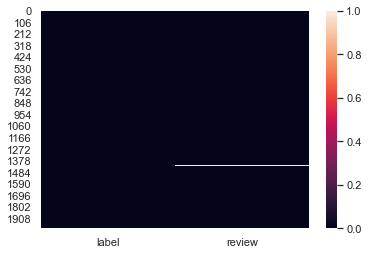

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [9]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [10]:
df = df[~df['review'].str.isspace()]

In [11]:
df[df['review'].apply(lambda review: review=='')]

,label,review


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [13]:
df['label'].iplot(kind='hist')

<AxesSubplot:xlabel='label', ylabel='count'>

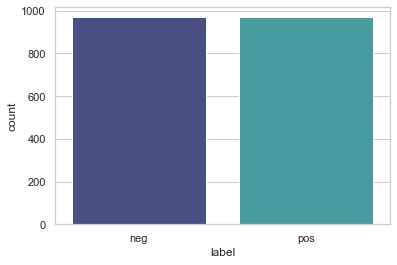

In [14]:
sns.countplot(data = df, x = 'label', palette='mako')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

matrix = count_vect.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])
# sort from largest to smallest
print(sorted(freqs, key = lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [16]:
X = df['review']
y = df['label']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                ('MNB', MultinomialNB())])

In [21]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('MNB', MultinomialNB())])

In [22]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [23]:
preds = pipe.predict(X_test)

In [24]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



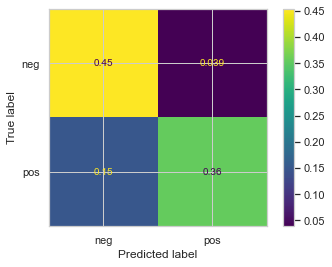

In [25]:
plot_confusion_matrix(pipe,X_test,y_test,normalize = 'all')